In [16]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import metrics

# csv files reading

In [6]:
columns = ["Video", "Frame", "Predicted", "Real"]
ade = pd.read_csv('predict-embeddingAdenoma.csv', header=None)
ade.columns = columns
hyp = pd.read_csv('predict-embeddingHiperplastic.csv', header=None)
hyp.columns = columns
ser = pd.read_csv('predict-embeddingSerrated.csv', header=None)
ser.columns = columns

In [7]:
ade.head()

,Video,Frame,Predicted,Real
0,adenoma_NBI/video_1,386,adenoma,adenoma
1,adenoma_NBI/video_1,387,adenoma,adenoma
2,adenoma_NBI/video_1,388,adenoma,adenoma
3,adenoma_NBI/video_1,389,adenoma,adenoma
4,adenoma_NBI/video_1,390,adenoma,adenoma


## Concatenating

In [8]:
total_df = pd.concat([ade, hyp, ser])
total_df = total_df.reset_index(drop = True)
total_df

,Video,Frame,Predicted,Real
0,adenoma_NBI/video_1,386,adenoma,adenoma
1,adenoma_NBI/video_1,387,adenoma,adenoma
2,adenoma_NBI/video_1,388,adenoma,adenoma
3,adenoma_NBI/video_1,389,adenoma,adenoma
4,adenoma_NBI/video_1,390,adenoma,adenoma
...,...,...,...,...
12527,serrated_NBI/video_76,422,adenoma,serrated
12528,serrated_NBI/video_76,423,adenoma,serrated
12529,serrated_NBI/video_76,424,adenoma,serrated
12530,serrated_NBI/video_76,425,adenoma,serrated


# Metrics
## confussion matrix

In [12]:
y_true = total_df['Real'].values
y_true = y_true.tolist()
y_pred = total_df['Predicted'].values
y_pred = y_pred.tolist()
cm = confusion_matrix(y_true=y_true, y_pred=y_pred, normalize='true')
print(cm)

[[0.99390337 0.00426764 0.00182899]
 [0.97540046 0.01773455 0.00686499]
 [0.98949495 0.00888889 0.00161616]]


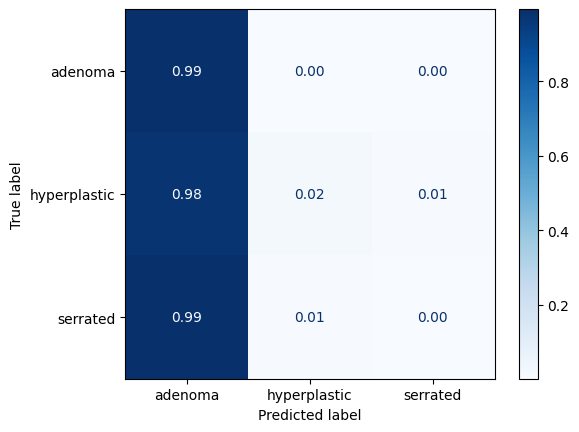

In [15]:
target_names = ['adenoma', 'hyperplastic', 'serrated']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp = disp.plot(include_values=True, cmap=plt.cm.Blues, xticks_rotation='horizontal', values_format='.2f')
plt.show()
#plt.savefig('confusion_matrix_art_Nbi_80.png')

## general report

In [17]:
print(metrics.classification_report(y_true, y_pred, target_names=["adenoma","hiperplastico", "serrated"]))

               precision    recall  f1-score   support

      adenoma       0.53      0.99      0.69      6561
hiperplastico       0.55      0.02      0.03      3496
     serrated       0.10      0.00      0.00      2475

     accuracy                           0.53     12532
    macro avg       0.39      0.34      0.24     12532
 weighted avg       0.45      0.53      0.37     12532

